# Introducción. Modelos preentrenados.

```{index} ImageNet
```

PyTorch cuenta con una buena cantidad de modelos preentrenados en el <a href="https://pytorch.org/vision/stable/models.html" target="_blank"> módulo de TorchVision </a>, listos ya para poder ser usados con los pesos que en el modelo de entrenamiento se les hayan asignado. En este módulo vamos a ver los que se tienen en PyTorch para computeVisión, pero sobre todo nos centraremos en dos.

El modelo preentrenado de imágenes, está basado en un buen conjunto de imágenes que se pueden encontrar <a href="https://image-net.org/update-mar-11-2021.php" target="_blank"> en este enlace </a>. ImageNet está compuesto por un total de catorce millones de imágenes, y que es mantenido por la universidad de Stanford. Todas las imágenes están etiquetas por una Jerarquía de nombres similar a la que utiliza WordNet (<a href="https://wordnet.princeton.edu/" target="_blank">https://wordnet.princeton.edu/</a> ) 

Los modelos preentrenados se pueden encontrar en *torchvision.models*, y por lo tanto procedemos a su carga

In [1]:
import torch
torch.__version__

'1.7.1+cu110'

In [3]:
from torchvision import models

import torch.fx

Podemos ver una lista de modelos a preentrenado con la siguiente intrucción

In [5]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

De entre estos modelos, vamos a centrarnos en *Alexnet* y *ResNet*.

## AlexNet.

La arquitectura de este modelo se pude ver en el siguiente gráfico

![](figuras/AlexNet.PNG)

En esta figura, las imágenes de entrada entran por la izquierda y pasan por cinco pilas de filtros, cada uno de los cuales produce una serie de imágenes de salida. Después de cada filtro, las imágenes de tamaño, como se indica. Las imágenes producidas por la última pila de filtros se presentan como un conjunto de vector 1D de 4.096 elementos y se clasifican para producir 1.000 probabilidades de salida, una para cada clase de salida.

Para cargar este modelo obtenemos una instancia de la clase

In [6]:
alexnet = models.AlexNet()

De esta manera ya tendriamos en funcionamiento y listo para usar el modelo AlexNet.

## ResNet.

```{index} ResNet
```

Usando la función *resnet101*, instanciaremos ahora una red neuronal convolucional de 101 capas capas. Para poner las cosas en perspectiva, antes de la llegada de las redes residuales en 2015, lograr un entrenamiento estable a tales profundidades se consideraba extremadamente difícil. Las redes residuales que lo hicieron posible, y al hacerlo, batieron varios puntos de referencia en un solo barrido ese año.

Para poner en marcha este tipo de red neuronal, tan sólo tendremos que ejecutar el siguiente código:

In [7]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\Francisco/.cache\torch\hub\checkpoints\resnet101-5d3b4d8f.pth


Como podemos comprobar, esta red tarda u poco en cargar, hay que tener presenta que soporta nada más y nada menos que 44.5 millones de parámetros.

Veamos cual es la estructura de esta última red neuronal.

In [8]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Lo que vemos aquí son módulos, uno por línea. Tenga en cuenta que no tienen nada en común con los módulos de Python: son operaciones individuales, los bloques de construcción de una red neuronal. También se llaman capas en otros marcos de aprendizaje profundo.

Si nos desplazamos hacia abajo, veremos un montón de módulos *Bottleneck* que se repiten uno tras otro (¡101! en total).
, que contienen convoluciones y otros módulos. Esa es la anatomía de una típica red neuronal profunda para visión por ordenador: una cascada más o menos secuencial  de filtros y funciones no lineales, que termina con una capa (fc) que produce puntuaciones para cada una de las 1.000 clases de salida (out_features).

Con PyTorch se pueden hacer transformaciones mediante el módulo *transforms*.

In [13]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])


Vamos a continuación a procesar una imagen mediante el paquete de Python PIL

In [10]:
from PIL import Image
img = Image.open("figuras/bobby.jpg")

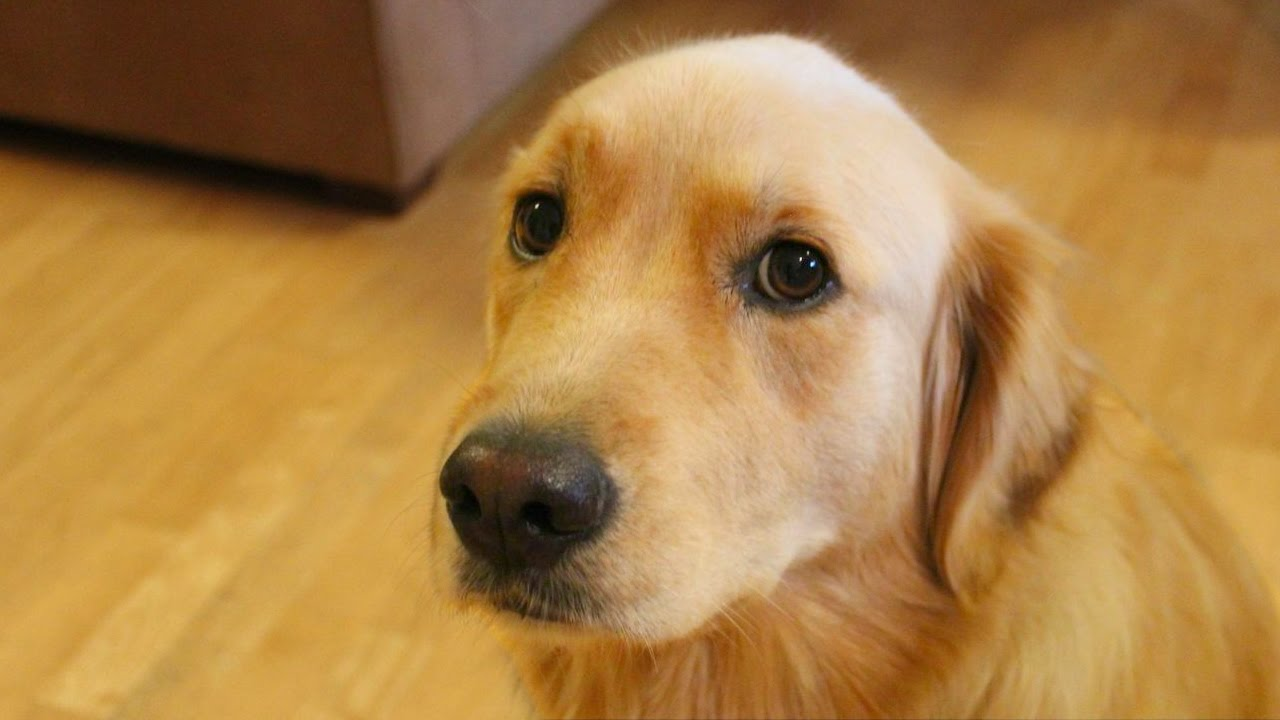

In [11]:
img

Ahora lo que hacemos son las transformaciones de la imagen que hemos programado anteriormente con *transforms.Compose()*

In [14]:
img_t = preprocess(img)

In [16]:
img_t

tensor([[[-0.6281, -0.6452, -0.6623,  ...,  0.0056, -0.0287, -0.0629],
         [-0.7137, -0.6965, -0.6965,  ...,  0.0227,  0.0227,  0.0056],
         [-0.7137, -0.7137, -0.7137,  ...,  0.0398,  0.0741,  0.0569],
         ...,
         [ 1.4440,  1.4269,  1.4783,  ...,  0.6049,  0.6221,  0.6906],
         [ 1.4269,  1.4440,  1.4783,  ...,  0.6906,  0.6734,  0.7077],
         [ 1.4612,  1.4783,  1.5297,  ...,  0.6906,  0.7248,  0.7591]],

        [[-1.2829, -1.2829, -1.2829,  ..., -0.6352, -0.6702, -0.7052],
         [-1.2654, -1.2654, -1.2654,  ..., -0.6176, -0.6527, -0.7052],
         [-1.2479, -1.2479, -1.2654,  ..., -0.6176, -0.6001, -0.6527],
         ...,
         [ 0.7829,  0.8004,  0.8704,  ..., -0.2850, -0.2675, -0.2150],
         [ 0.7654,  0.8354,  0.9055,  ..., -0.2150, -0.2150, -0.1625],
         [ 0.8004,  0.8529,  0.9230,  ..., -0.1800, -0.1275, -0.0749]],

        [[-1.4907, -1.4559, -1.4210,  ..., -1.0376, -1.0898, -1.1421],
         [-1.5081, -1.4559, -1.4210,  ..., -1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


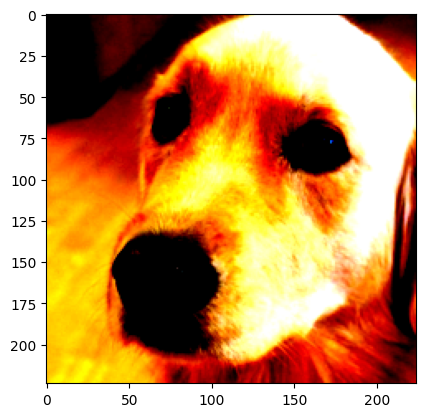

In [17]:
# La imagen ahora quedaría de la siguiente manera
import matplotlib.pyplot as plt

plt.imshow(  img_t.permute(1, 2, 0)  )

A continuación, podemos remodelar, recortar y normalizar el tensor de entrada en el formato que la red espera 

In [18]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

Y de esta manera ya estariamos en condiciones de ejecutar el modelo.

El proceso de ejecutar un modelo entrenado con nuevos datos se denomina *inferencia* en los círculos del aprendizaje profundo. Para realizar la inferencia, tenemos que poner la red en modo de evaluación:

In [19]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Si nos olvidamos de hacerlo, algunos modelos preentrenados, como la normalización por lotes y el abandono, no producirán respuestas significativas, sólo por la forma en que trabajan internamente. Ahora que la evaluación se ha establecido, estamos listos para la inferencia:

In [20]:
out = resnet(batch_t)
out

tensor([[-3.4997e+00, -1.6490e+00, -2.4391e+00, -3.2243e+00, -3.2465e+00,
         -1.3218e+00, -2.0395e+00, -2.5405e+00, -1.3043e+00, -2.8827e+00,
         -1.6696e+00, -1.2838e+00, -2.6184e+00, -2.9750e+00, -2.4380e+00,
         -2.8256e+00, -3.3083e+00, -7.9667e-01, -6.7075e-01, -1.2162e+00,
         -3.0311e+00, -3.9593e+00, -2.2631e+00, -1.0843e+00, -9.7915e-01,
         -1.0742e+00, -3.0908e+00, -2.4751e+00, -2.2153e+00, -3.1932e+00,
         -3.2964e+00, -1.8507e+00, -2.0642e+00, -2.1202e+00, -1.8665e+00,
         -3.2375e+00, -1.1210e+00, -1.1321e+00, -1.1657e+00, -9.0362e-01,
         -4.5209e-01, -1.4986e+00,  1.4366e+00,  1.2994e-01, -1.8379e+00,
         -1.4815e+00,  9.7278e-01, -9.3662e-01, -3.0276e+00, -2.7341e+00,
         -2.5960e+00, -2.0591e+00, -1.8170e+00, -1.9437e+00, -1.7875e+00,
         -1.3029e+00, -4.5200e-01, -2.0560e+00, -3.2882e+00, -4.7583e-01,
         -3.6261e-01, -1.1650e+00, -7.3942e-01, -1.4489e+00, -1.5039e+00,
         -2.1096e+00, -1.7095e+00, -4.

Ahora nos queda clasificar la imagen, para ello debemos cargar el fichero que contiene las posibles clases de clasificación

In [21]:
with open('textosimagenes/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

Ahora necesitamos el índice correspondiente al mayor score. Lo podemos hacer así

In [24]:
_, index = torch.max(out, 1)
index[0]

tensor(207)

Ahora podemos utilizar el índice para acceder a la etiqueta. Aquí, el índice no es un número simple de Python, sino un tensor unidimensional de un elemento (en concreto, tensor([207])), por lo que necesitamos  obtener el valor numérico real para usarlo como índice en nuestra lista de etiquetas usando index[0]. También utilizamos torch.nn.functional.softmax (http://mng.bz/BYnq) para normalizar nuestras salidas al rango [0, 1], y dividir por la suma. Esto nos da algo
aproximadamente parecido a la confianza que el modelo tiene en su predicción. En este caso, el modelo está 96% seguro de que sabe que lo que está viendo es un golden retriever: 

In [25]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 96.57185363769531)

Como el modelo produce puntuaciones, también podemos averiguar cuál es la segunda mejor, la tercera mejor, etcétera. y así sucesivamente. Para ello, podemos utilizar la función de *sort*, que ordena los valores en orden ascendente o descendente y también proporciona los índices de los valores ordenados en la matriz original: 

In [26]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]


[('golden retriever', 96.57185363769531),
 ('Labrador retriever', 2.6082706451416016),
 ('cocker spaniel, English cocker spaniel, cocker', 0.2699621915817261),
 ('redbone', 0.17958936095237732),
 ('tennis ball', 0.10991999506950378)]

Vemos que los cuatro primeros son perros (redbone es una raza; ¿quién lo diría?), después de lo cual las cosas empiezan a ponerse divertidas. La quinta respuesta, "pelota de tenis", se debe probablemente a que hay suficientes  fotos de pelotas de tenis con perros cerca como para que el modelo diga: "Hay un 0,1% de posibilidades de que haya entendido mal lo que es una pelota de tenis". Este es un gran ejemplo de las diferencias fundamentales en cómo los humanos y las redes neuronales ven el mundo, así como lo fácil que es que extraños y sutiles sesgos se cuelen en nuestros datos.